In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sage_data_client

In [3]:
df = sage_data_client.query(
    start="-14d",
    #end="2023-03-01T00:00:00",
    filter={
        "name": "env.raingauge.event_acc", #total
        "vsn":"W024",
    }
)

In [4]:
df

,timestamp,name,value,meta.host,meta.job,meta.node,meta.plugin,meta.task,meta.vsn,meta.zone
0,2023-02-15 18:13:49.419582316+00:00,env.raingauge.event_acc,11.76,0000dca632a3074d.ws-rpi,Pluginctl,000048b02d15bc73,waggle/plugin-raingauge:0.4.1,wes-raingauge,W024,shield
1,2023-02-15 18:14:19.457909642+00:00,env.raingauge.event_acc,11.76,0000dca632a3074d.ws-rpi,Pluginctl,000048b02d15bc73,waggle/plugin-raingauge:0.4.1,wes-raingauge,W024,shield
2,2023-02-15 18:14:49.488441722+00:00,env.raingauge.event_acc,11.76,0000dca632a3074d.ws-rpi,Pluginctl,000048b02d15bc73,waggle/plugin-raingauge:0.4.1,wes-raingauge,W024,shield
3,2023-02-15 18:15:19.537376638+00:00,env.raingauge.event_acc,11.76,0000dca632a3074d.ws-rpi,Pluginctl,000048b02d15bc73,waggle/plugin-raingauge:0.4.1,wes-raingauge,W024,shield
4,2023-02-15 18:15:49.550841999+00:00,env.raingauge.event_acc,11.76,0000dca632a3074d.ws-rpi,Pluginctl,000048b02d15bc73,waggle/plugin-raingauge:0.4.1,wes-raingauge,W024,shield
...,...,...,...,...,...,...,...,...,...,...
37621,2023-02-28 20:03:24.078334163+00:00,env.raingauge.event_acc,36.69,0000dca632a3074d.ws-rpi,Pluginctl,000048b02d15bc73,waggle/plugin-raingauge:0.4.1,wes-raingauge,W024,shield
37622,2023-02-28 20:03:54.103327691+00:00,env.raingauge.event_acc,36.69,0000dca632a3074d.ws-rpi,Pluginctl,000048b02d15bc73,waggle/plugin-raingauge:0.4.1,wes-raingauge,W024,shield
37623,2023-02-28 20:04:24.146457463+00:00,env.raingauge.event_acc,36.69,0000dca632a3074d.ws-rpi,Pluginctl,000048b02d15bc73,waggle/plugin-raingauge:0.4.1,wes-raingauge,W024,shield
37624,2023-02-28 20:04:54.155514743+00:00,env.raingauge.event_acc,36.69,0000dca632a3074d.ws-rpi,Pluginctl,000048b02d15bc73,waggle/plugin-raingauge:0.4.1,wes-raingauge,W024,shield


<AxesSubplot: xlabel='timestamp'>

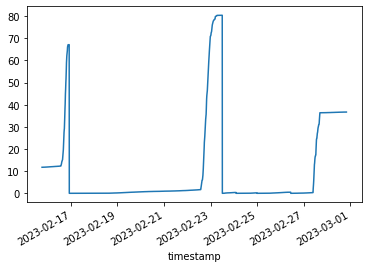

In [5]:
df.set_index("timestamp").value.plot()

In [6]:
rain = sage_data_client.query(
    start="-14d",
    #end="2023-03-01T00:00:00",
    filter={
        "name": "env.raingauge.total_acc", #total
        "vsn":"W024",
    }
)

<AxesSubplot: xlabel='timestamp'>

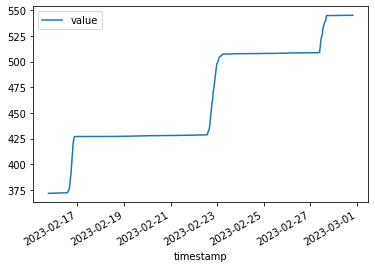

In [7]:
rain.set_index("timestamp").plot()

In [8]:
intensity = sage_data_client.query(
    start="-14d",
    #end="2023-03-01T00:00:00",
    filter={
        "name": "env.raingauge.rint", #total
        "vsn":"W024",
    }
)

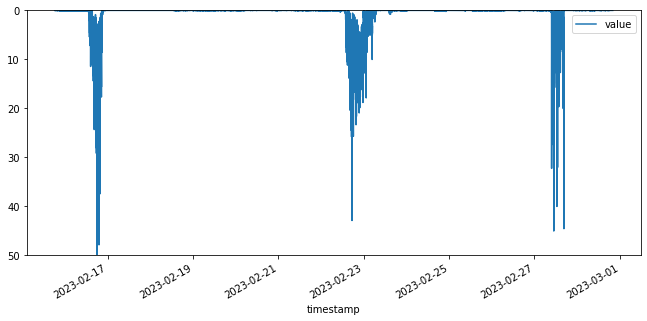

In [9]:
fig, ax = plt.subplots(figsize=[11,5])
intensity.set_index("timestamp").plot(ax=ax)
ax.set_ylim(50,0)
plt.show()

In [28]:
intens = intensity["value"]
cumins = intens.cumsum()
rollins = intens.rolling(120*2, center=True).sum()

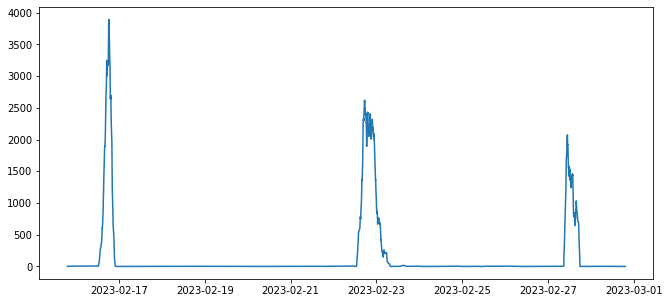

In [29]:
fig, ax = plt.subplots(figsize=[11,5])
ax.plot(intensity["timestamp"], rollins)
plt.show()

In [40]:
images = sage_data_client.query(
    start="-15d",
    #end="2022-10-10T19:01:25.000Z",
    filter={
        "vsn": "W024",
        "task": "imagesampler.*"
    }
)

In [44]:
images

,timestamp,name,value,meta.filename,meta.host,meta.job,meta.node,meta.plugin,meta.task,meta.vsn,meta.zone
0,2023-03-01 16:06:36.130334041+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc73.ws-nxcore,imagesampler-bottom,000048b02d15bc73,registry.sagecontinuum.org/theone/imagesampler...,imagesampler-bottom,W024,core
1,2023-02-16 18:02:30.743922997+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc73.ws-nxcore,imagesampler-top,000048b02d15bc73,registry.sagecontinuum.org/theone/imagesampler...,imagesampler-top,W024,core
2,2023-02-25 08:03:00.839122919+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc73.ws-nxcore,imagesampler-top,000048b02d15bc73,registry.sagecontinuum.org/theone/imagesampler...,imagesampler-top,W024,core
3,2023-02-14 19:44:20.580751400+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc73.ws-nxcore,sage,000048b02d15bc73,waggle/plugin-image-sampler:0.2.5,imagesampler-left,W024,NaN
4,2023-02-14 20:44:22.460629028+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc73.ws-nxcore,sage,000048b02d15bc73,waggle/plugin-image-sampler:0.2.5,imagesampler-left,W024,NaN
...,...,...,...,...,...,...,...,...,...,...,...
878,2023-02-27 09:00:31.448680701+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,0000dca632a3074d.ws-rpi,NaN,000048b02d15bc73,registry.sagecontinuum.org/theone/imagesampler...,imagesampler-top,W024,shield
879,2023-02-27 10:01:16.765780150+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,0000dca632a3074d.ws-rpi,NaN,000048b02d15bc73,registry.sagecontinuum.org/theone/imagesampler...,imagesampler-top,W024,shield
880,2023-02-27 23:00:30.710317917+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,0000dca632a3074d.ws-rpi,NaN,000048b02d15bc73,registry.sagecontinuum.org/theone/imagesampler...,imagesampler-top,W024,shield
881,2023-02-28 11:00:26.708568860+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,0000dca632a3074d.ws-rpi,NaN,000048b02d15bc73,registry.sagecontinuum.org/theone/imagesampler...,imagesampler-top,W024,shield


In [43]:
for img in images["value"]:
    print(img)

https://storage.sagecontinuum.org/api/v1/data/imagesampler-bottom/sage-imagesampler-bottom-0.3.0/000048b02d15bc73/1677686796130334041-sample.jpg
https://storage.sagecontinuum.org/api/v1/data/imagesampler-top/sage-imagesampler-top-0.3.0/000048b02d15bc73/1676570550743922997-sample.jpg
https://storage.sagecontinuum.org/api/v1/data/imagesampler-top/sage-imagesampler-top-0.3.0/000048b02d15bc73/1677312180839122919-sample.jpg
https://storage.sagecontinuum.org/api/v1/data/sage/sage-imagesampler-left-0.2.5/000048b02d15bc73/1676403860580751400-sample.jpg
https://storage.sagecontinuum.org/api/v1/data/sage/sage-imagesampler-left-0.2.5/000048b02d15bc73/1676407462460629028-sample.jpg
https://storage.sagecontinuum.org/api/v1/data/sage/sage-imagesampler-left-0.2.5/000048b02d15bc73/1676411066752634971-sample.jpg
https://storage.sagecontinuum.org/api/v1/data/sage/sage-imagesampler-left-0.2.5/000048b02d15bc73/1676414678706470412-sample.jpg
https://storage.sagecontinuum.org/api/v1/data/sage/sage-imagesamp

In [33]:
print(images.value)

0    https://storage.sagecontinuum.org/api/v1/data/...
1    https://storage.sagecontinuum.org/api/v1/data/...
2    https://storage.sagecontinuum.org/api/v1/data/...
3    https://storage.sagecontinuum.org/api/v1/data/...
4    https://storage.sagecontinuum.org/api/v1/data/...
Name: value, dtype: object
